# Paso 1. Obtener datos

In [1]:
import ccxt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

exchange = ccxt.binance()
symbols = ("LTC/USD", "BCH/USD")
ltc = exchange.fetch_ohlcv(symbols[0], "1d")
bhc = exchange.fetch_ohlcv(symbols[1], "1d")

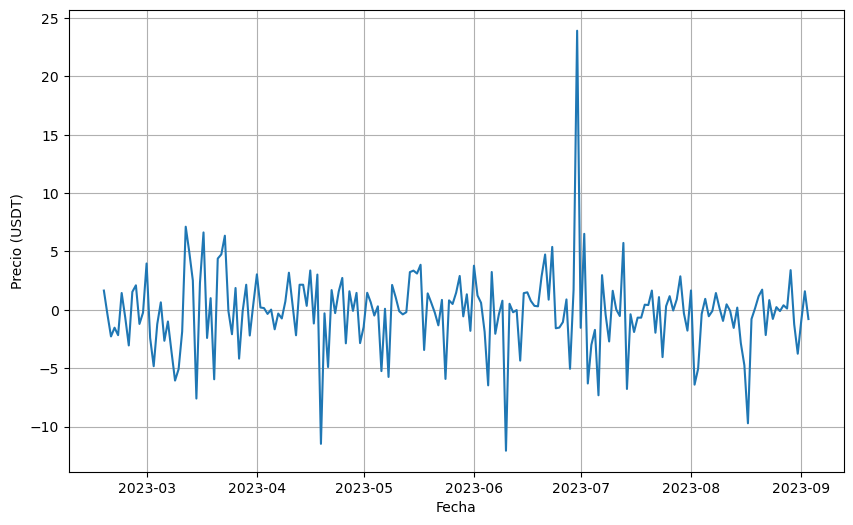

In [16]:
columns = ["timestamp", "open", "high", "low", "close", "volume"]
ltc_df = pd.DataFrame(ltc, columns=columns)
bhc_df = pd.DataFrame(bhc, columns=columns)

timestamp = pd.to_datetime(ltc_df["timestamp"], unit="ms")
y_vals = ltc_df["close"].diff(1).to_numpy()[1:,]

plt.figure(figsize=(10, 6))
plt.plot(timestamp[1:,], y_vals, label=symbols[0])
plt.xlabel("Fecha")
plt.ylabel("Precio (USDT)")
plt.grid()
plt.show()

# Paso 2. Transformar datos

In [3]:
# TDA
from SW1PerS import sliding_window as SW_
from ripser import ripser
from persim import plot_diagrams

# Reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

SW_S = SW_()
SW_cloud = SW_S.fit_transform

In [27]:
x_vals = np.linspace(0, y_vals.shape[0], y_vals.shape[0])
f = np.array([x_vals, y_vals])
d = 4
tau = 1.5
n_data = 4000

SW = SW_cloud(f,tau, d, n_data )

In [28]:
# Reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualización
from matplotlib import pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

sc  = StandardScaler()
Xs = sc.fit_transform(SW)
pca = PCA(n_components=5)
SW_pca = pca.fit_transform(Xs)

print('Explained Variance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=SW_pca[:,0], y=SW_pca[:,1], z=SW_pca[:,2], 
    mode ='markers', 
    marker=dict(size = 1.5, color = 'grey')
)] , layout = go.Layout(scene = dict(aspectmode= 'data')))

fig.show()

Explained Variance [0.22402509 0.22348512 0.20607859 0.19945214 0.14695906]


# Paso 3. Aplicar homologia persistente

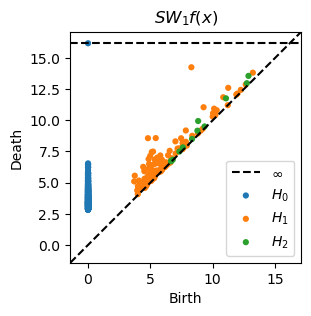

In [29]:
n_landmarks = 400
prime_coeff = 7

H_SW = ripser(SW, n_perm = n_landmarks, coeff = prime_coeff, maxdim=2)['dgms']

plt.figure(figsize = (12,3)) 
plot_diagrams(H_SW)
plt.title('$SW_1f(x)$');
x_left, x_right = plt.xlim()
y_left, y_right = plt.ylim()

In [30]:
def compute_and_print_max_pers(data, label="Periodicity"):
    mp_1_value = SW_S.max_pers(data, dim = 1)
    print(f"{label} mp_1:", mp_1_value)

compute_and_print_max_pers(SW)

Periodicity mp_1: 3.5057296752929688


In [39]:
from persim import PersistenceImager
import collections.abc as collections

H1_dgm = H_SW[1]
pigmr = PersistenceImager(pixel_size = 0.1)
pigmr.fit(H1_dgm)

fig, axis = plt.subplots(1,2, figsize=(15,5))
pigmr.plot_diagram(H1_dgm, skew=True, ax=axis[0])
axis[0].set_title("Diagram")

pigmr.plot_image(pigmr.transform(H1_dgm), ax=axis[1])
axis[1].set_title("Persistence Image. $H_1$")

AttributeError: module 'collections' has no attribute 'Iterable'